In [14]:
import pandas as pd
df = pd.read_csv (r'Diabetes_Pima.csv')
df.head()
df = df.drop('Patient ID', axis=1)
df.shape
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,5,108.0,72.0,43.0,75.0,36.1,0.263,33,Healthy
1,5,132.0,80.0,NaN,NaN,26.8,0.186,69,Healthy
2,1,196.0,76.0,36.0,249.0,36.5,0.875,29,Sick
3,0,91.0,68.0,32.0,210.0,39.9,0.381,25,Healthy
4,2,117.0,90.0,19.0,71.0,25.2,0.313,21,Healthy


In [15]:
import numpy as np
#df = df.drop('Diabetes', axis=1)
#mean_values = df.mean(skipna=True)
#print(mean_values)
df = df.dropna() #dropping rows with missing value. Default axis = 0 --> rows
df.head()

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diabetes
0,5,108.0,72.0,43.0,75.0,36.1,0.263,33,Healthy
2,1,196.0,76.0,36.0,249.0,36.5,0.875,29,Sick
3,0,91.0,68.0,32.0,210.0,39.9,0.381,25,Healthy
4,2,117.0,90.0,19.0,71.0,25.2,0.313,21,Healthy
5,0,95.0,80.0,45.0,92.0,36.5,0.330,26,Healthy


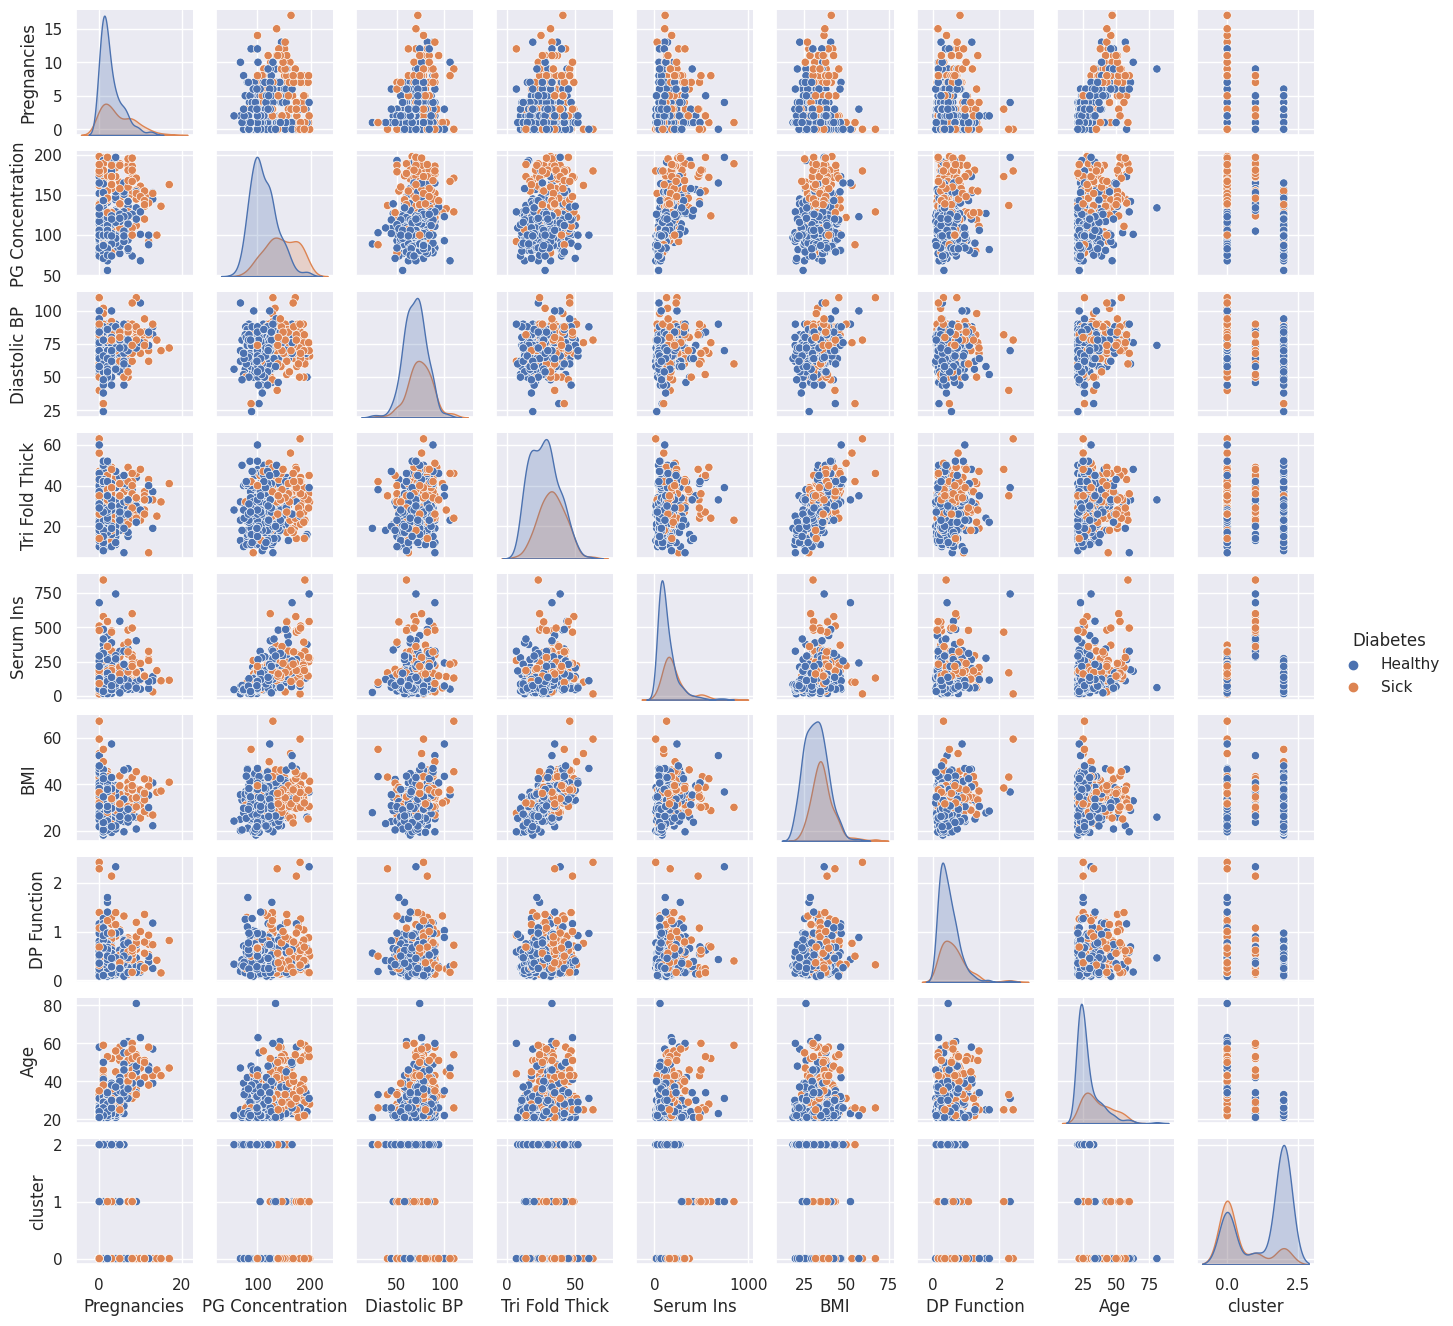

In [29]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='Diabetes',height=1.5)

<Axes: xlabel='BMI', ylabel='Tri Fold Thick'>

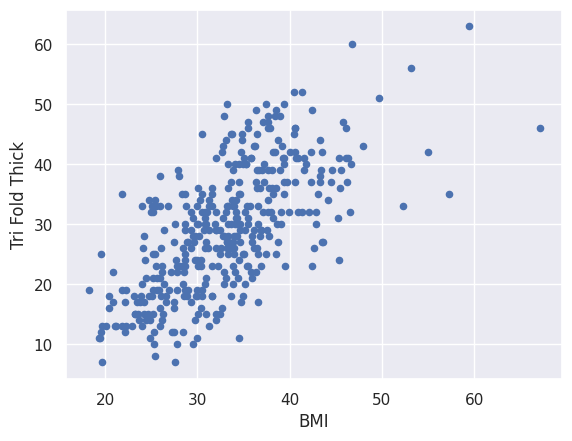

In [13]:
df.plot.scatter(x ='BMI', y = 'Tri Fold Thick')

In [18]:
## Linear Regression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression(fit_intercept=True)

x = np.array(df['BMI'])
y = np.array(df['Tri Fold Thick'])

model.fit(x[:, np.newaxis], y) #Reshaping the x array from 1D array to 2D because scikit-learn's fit() method expects the input to be a 2-dimensional array

xfit = np.linspace(5, 70) #xfit is created as a new array of evenly spaced values using np.linspace(). 
                          #It specifies the start and end points (5 and 70, respectively) and generates a 1-dimensional array with default 50 points.


yfit = model.predict(xfit[:, np.newaxis])
#print(xfit,"\n", yfit)

[ 5.          6.32653061  7.65306122  8.97959184 10.30612245 11.63265306
 12.95918367 14.28571429 15.6122449  16.93877551 18.26530612 19.59183673
 20.91836735 22.24489796 23.57142857 24.89795918 26.2244898  27.55102041
 28.87755102 30.20408163 31.53061224 32.85714286 34.18367347 35.51020408
 36.83673469 38.16326531 39.48979592 40.81632653 42.14285714 43.46938776
 44.79591837 46.12244898 47.44897959 48.7755102  50.10204082 51.42857143
 52.75510204 54.08163265 55.40816327 56.73469388 58.06122449 59.3877551
 60.71428571 62.04081633 63.36734694 64.69387755 66.02040816 67.34693878
 68.67346939 70.        ] 
 [ 1.22312852  2.54191591  3.8607033   5.17949069  6.49827808  7.81706547
  9.13585287 10.45464026 11.77342765 13.09221504 14.41100243 15.72978982
 17.04857721 18.3673646  19.68615199 21.00493938 22.32372677 23.64251416
 24.96130155 26.28008894 27.59887633 28.91766373 30.23645112 31.55523851
 32.8740259  34.19281329 35.51160068 36.83038807 38.14917546 39.46796285
 40.78675024 42.10553763

Text(0, 0.5, 'Tricep Fold Thickness (cm)')

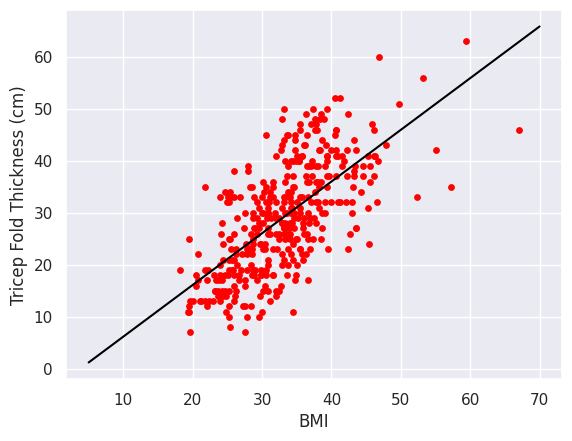

In [15]:
plt.scatter(x, y, c = "red", s = 15)
plt.plot(xfit, yfit, color='black');
plt.xlabel("BMI")
plt.ylabel("Tricep Fold Thickness (cm)")

In [9]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.9941628022079217
Model intercept: -3.7476854899905696


In [10]:
X = x[:, np.newaxis]
X.shape

(392, 1)

In [11]:
model.fit(X, y)

LinearRegression()

In [17]:
## Preparing for GMM to learn predictive model for sic/healthy

X_diabetes = df.drop('Diabetes', axis=1)
X_diabetes.shape

(392, 8)

In [18]:
y_diabetes = df['Diabetes']
y_diabetes.shape

(392,)

In [19]:
#naive-bayes supervized learning ##splitting our dataset into training and testing groups
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_diabetes, y_diabetes,  #75-25 split
                                                random_state=1)

Xtrain.shape

(294, 8)

In [20]:
## select model type generates the model
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [21]:
#find out how well it works
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7346938775510204

In [22]:
# PCA unsupervized learning generate model
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_diabetes)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_diabetes)         # 4. Transform the data to two dimensions
X_2D.shape

(392, 2)

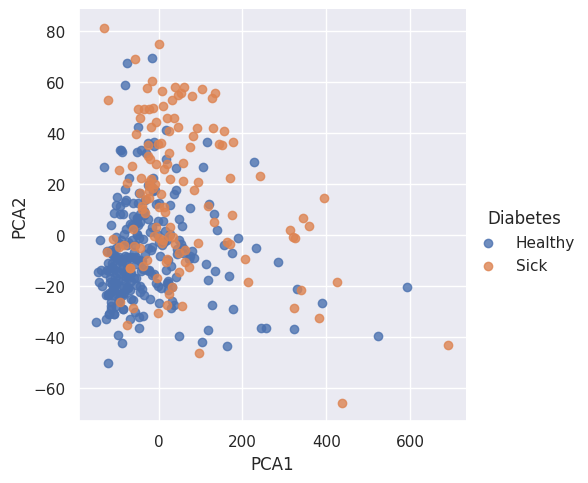

In [34]:
## visualize PCA results by generating a PC1 and PC2 scatterplot
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue='Diabetes', data=df, fit_reg=False)

In [35]:
#unsupervized learning gaussian mixture model clustering using GMM fit the model
from sklearn import mixture     # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_diabetes)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_diabetes)        # 4. Determine cluster labels
print(y_gmm)


[2 2 0 0 0 2 2 1 2 0 0 0 0 2 2 0 1 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 2 0 0 2
 0 0 2 1 2 0 0 2 2 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 2
 2 2 0 2 2 0 0 2 1 1 1 1 2 0 1 0 2 2 2 2 0 0 2 1 2 2 0 0 2 0 0 2 2 0 2 0 0
 1 2 1 2 2 0 2 0 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 1 0 0 2 0 0 2 0 0 1 2 1
 0 2 2 0 2 0 0 2 2 1 2 0 0 2 2 0 2 2 2 1 0 2 0 2 1 1 0 2 2 0 2 1 0 2 0 2 2
 0 0 2 0 0 2 2 2 0 2 1 0 0 0 0 0 0 2 0 2 0 2 2 2 0 0 1 0 1 0 0 2 0 0 2 0 0
 0 2 0 2 2 2 0 2 0 2 0 2 0 2 0 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 2 1 0 0 0 0 2
 2 0 2 0 0 0 0 2 0 0 2 2 0 2 2 0 0 2 2 2 2 0 2 0 0 0 2 0 0 0 1 0 2 0 2 2 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 1 0 2 0 0 2 2 1 0 0 2 0 0 1 0 0 0 2 0 0 0 1
 2 0 0 2 2 2 2 0 1 2 0 1 2 0 0 2 0 0 2 2 2 2 2 2 0 0 0 0 2 0 2 2 0 2 2 0 0
 0 2 2 2 2 2 2 2 2 0 2 2 0 0 0 2 2 0 1 2 0 0]


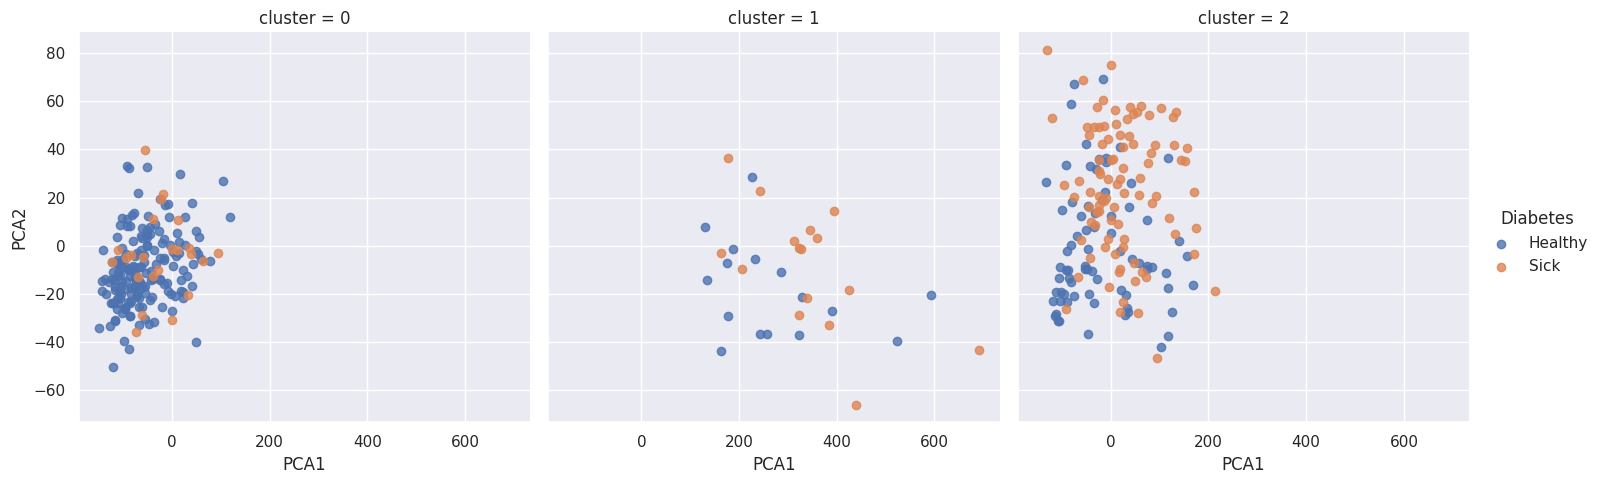

In [36]:
#split datapoints based on which cluster they were assigned 
#generate PCA scatterplots based on the clustered subsets
df['cluster'] = y_gmm
df.head()
sns.lmplot(x = "PCA1", y = "PCA2", data=df, hue='Diabetes',
           col='cluster', fit_reg=False)